In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv(os.getcwd()+'/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
train


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
train = train.drop(train['Weekly_Sales'].sort_values()[:5].index) ## 첫 5개의 데이터를 지운다.
## train = train[train['Weekly_Sales'] > -1100] 이렇게 해도 위와 같은 결과.

In [4]:
test = pd.read_csv(os.getcwd()+'/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
store = pd.read_csv(os.getcwd()+'/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
store ## 스토어의 사이즈별로 판매량을 학습할 수 있다.

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
display(train, test) ## 불리언값은 0,1 이므로 따로 바꾸지 않아도 됨.
## store, dept같이 범주형이 있기때문에 비선형이다. 트리로 모델링 한다.

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [7]:
train['Date'] = train['Date'].astype('datetime64')
train['year'] = train['Date'].dt.year
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year
0,1,1,2010-02-05,24924.50,False,2010
1,1,1,2010-02-12,46039.49,True,2010
2,1,1,2010-02-19,41595.55,False,2010
3,1,1,2010-02-26,19403.54,False,2010
4,1,1,2010-03-05,21827.90,False,2010


In [8]:
test['Date'] = test['Date'].astype('datetime64')
test['year'] = test['Date'].dt.year
test.head()

,Store,Dept,Date,IsHoliday,year
0,1,1,2012-11-02,False,2012
1,1,1,2012-11-09,False,2012
2,1,1,2012-11-16,False,2012
3,1,1,2012-11-23,True,2012
4,1,1,2012-11-30,False,2012


In [9]:
# 연도별 차이를 보기위해 group by를 쓴다. 그래프로도 본다. 그래프로 보기 힘들때 그룹바이로 본다.
train.groupby('year')['Weekly_Sales'].mean() ## 연도별로 Weekly_Sales를 본다.

year
2010    16270.554955
2011    15954.312796
2012    15695.085088
Name: Weekly_Sales, dtype: float64

In [10]:
train['year'].value_counts() ## 위의 연도별 차이가 얼마 안나는데 별로 도움이 안될 것 같다. 진짜로 도움 안될 것 같은지 각 카테고리별 데이터개수를 본다.
## 데이터 자체의 개수는 매우 많다. 그러므로 위의 연도별 차이는 작더라도 큰 차이이다. --> 모델에 도움이 됨.

2011    153451
2010    140677
2012    127437
Name: year, dtype: int64

In [11]:
train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [12]:
train['day'] = train['Date'].dt.day
test['day'] = test['Date'].dt.day

In [13]:
train = pd.merge(train, store, on = 'Store', how = 'left')## Store칼럼 기준으로 train 을 왼쪽, store를 오른쪽에
test = pd.merge(test, store, on = 'Store', how = 'left')
display(train, test)

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,day,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2,5,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2,12,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2,19,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2,26,A,151315
4,1,1,2010-03-05,21827.90,False,2010,3,5,A,151315
...,...,...,...,...,...,...,...,...,...,...
421560,45,98,2012-09-28,508.37,False,2012,9,28,B,118221
421561,45,98,2012-10-05,628.10,False,2012,10,5,B,118221
421562,45,98,2012-10-12,1061.02,False,2012,10,12,B,118221
421563,45,98,2012-10-19,760.01,False,2012,10,19,B,118221


,Store,Dept,Date,IsHoliday,year,month,day,Type,Size
0,1,1,2012-11-02,False,2012,11,2,A,151315
1,1,1,2012-11-09,False,2012,11,9,A,151315
2,1,1,2012-11-16,False,2012,11,16,A,151315
3,1,1,2012-11-23,True,2012,11,23,A,151315
4,1,1,2012-11-30,False,2012,11,30,A,151315
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,2013,6,28,B,118221
115060,45,98,2013-07-05,False,2013,7,5,B,118221
115061,45,98,2013-07-12,False,2013,7,12,B,118221
115062,45,98,2013-07-19,False,2013,7,19,B,118221


In [14]:
train = train.replace({'A':1, 'B':2, 'C':3}) ## A,B,C를 1,2,3으로 숫자로 바꿔준다.
test = test.replace({'A':1, 'B':2, 'C':3})

In [15]:
# train['weekday'] = train['Date'].dt.weekday
# test['weekday'] = test['Date'].dt.weekday
# train['weekday'].value_counts() ## 주별판매량이라 weekday는 하나밖에 없다. 굳이 추가할 필요 없음.

In [16]:
## 월 별로 주를 추가(첫째주,둘째주) 하던지 1년을 52주로 나눠서 추가하든지.
train['week'] = train['Date'].dt.week ## 1년을 52주로 나눈다.
test['week'] = test['Date'].dt.week

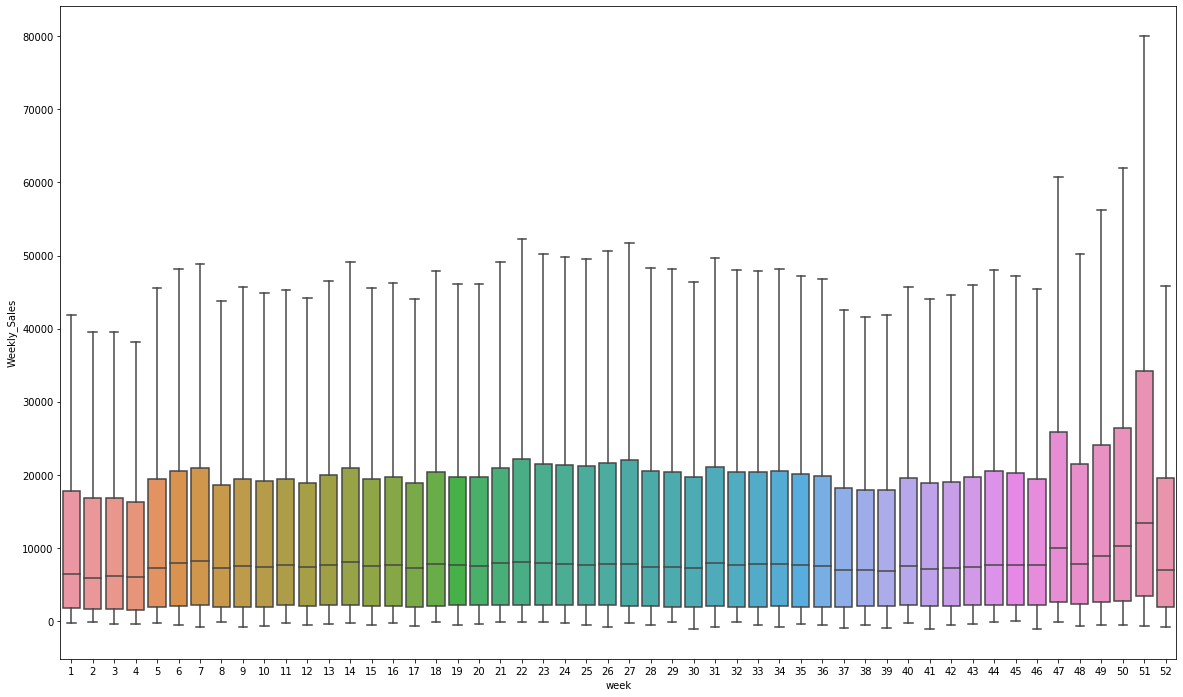

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,12))
sns.boxplot(train['week'], train['Weekly_Sales'], showfliers = False)

In [18]:
np.ceil(train['day']/7)

0         1.0
1         2.0
2         3.0
3         4.0
4         1.0
         ... 
421560    4.0
421561    1.0
421562    2.0
421563    3.0
421564    4.0
Name: day, Length: 421565, dtype: float64

In [19]:
train['week_num'] = np.ceil(train['day']/7)
test['week_num'] = np.ceil(test['day']/7)

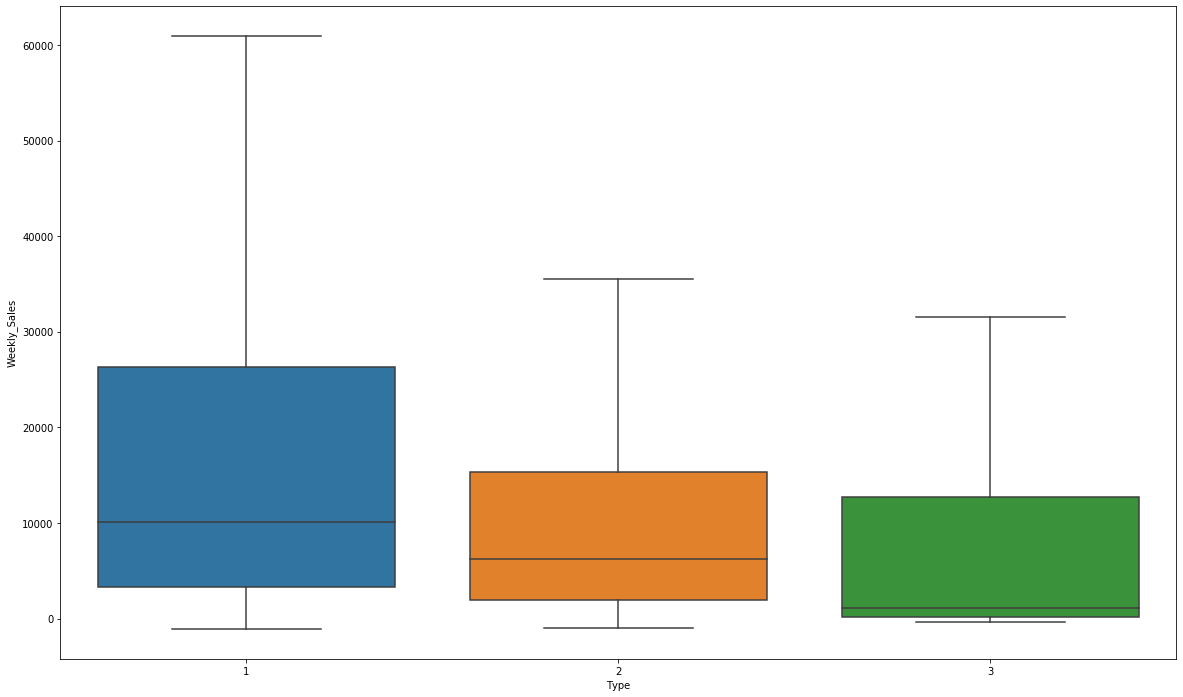

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,12))
sns.boxplot(train['Type'], train['Weekly_Sales'], showfliers = False)

In [21]:
train.groupby('Type')['Weekly_Sales'].mean()

Type
1    20099.783889
2    12237.345618
3     9519.532538
Name: Weekly_Sales, dtype: float64

In [22]:
train['Type'].value_counts()

1    215476
2    163492
3     42597
Name: Type, dtype: int64

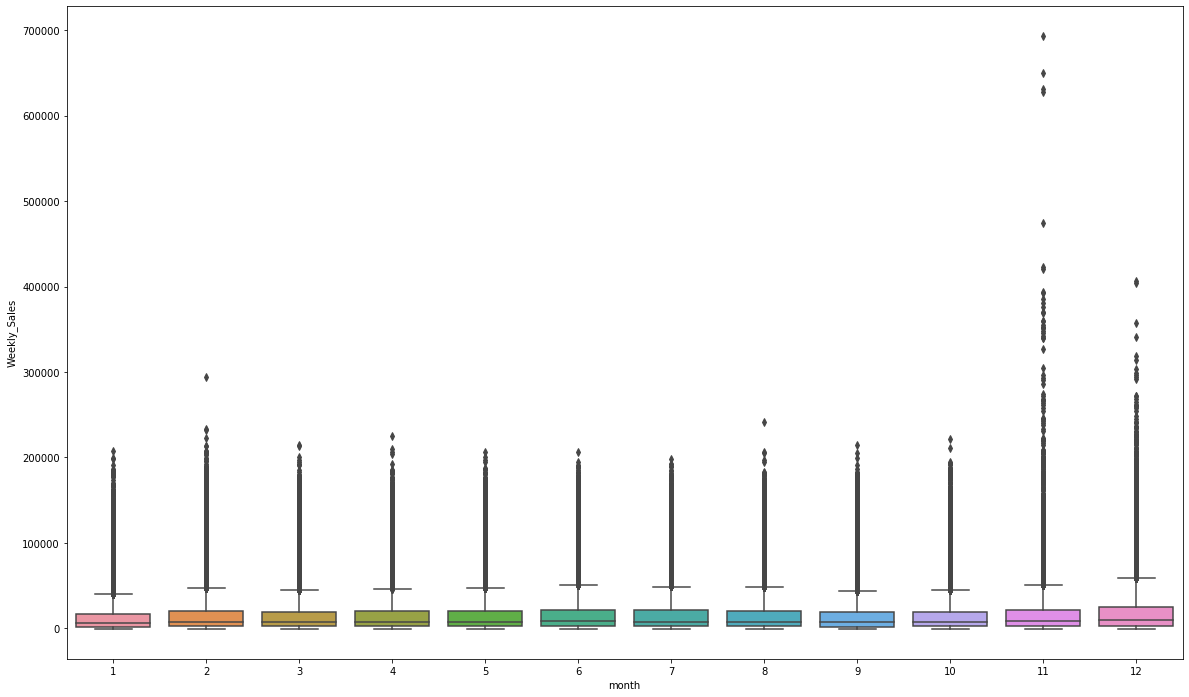

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,12))
sns.boxplot(train['month'], train['Weekly_Sales']) ## 아웃라이어가 너무 많음. 11월에는 이상하게 더 많음. 아마 11월에 있는 공휴일에는 장사가 더 잘되는 것 아닐까?

In [24]:
train3 = train[train['Weekly_Sales'] < 50000] # 밑의 박스가 잘 안보이므로 아웃라이어 빼고 보기
train3

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,day,Type,Size,week,week_num
0,1,1,2010-02-05,24924.50,False,2010,2,5,1,151315,5,1.0
1,1,1,2010-02-12,46039.49,True,2010,2,12,1,151315,6,2.0
2,1,1,2010-02-19,41595.55,False,2010,2,19,1,151315,7,3.0
3,1,1,2010-02-26,19403.54,False,2010,2,26,1,151315,8,4.0
4,1,1,2010-03-05,21827.90,False,2010,3,5,1,151315,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
421560,45,98,2012-09-28,508.37,False,2012,9,28,2,118221,39,4.0
421561,45,98,2012-10-05,628.10,False,2012,10,5,2,118221,40,1.0
421562,45,98,2012-10-12,1061.02,False,2012,10,12,2,118221,41,2.0
421563,45,98,2012-10-19,760.01,False,2012,10,19,2,118221,42,3.0


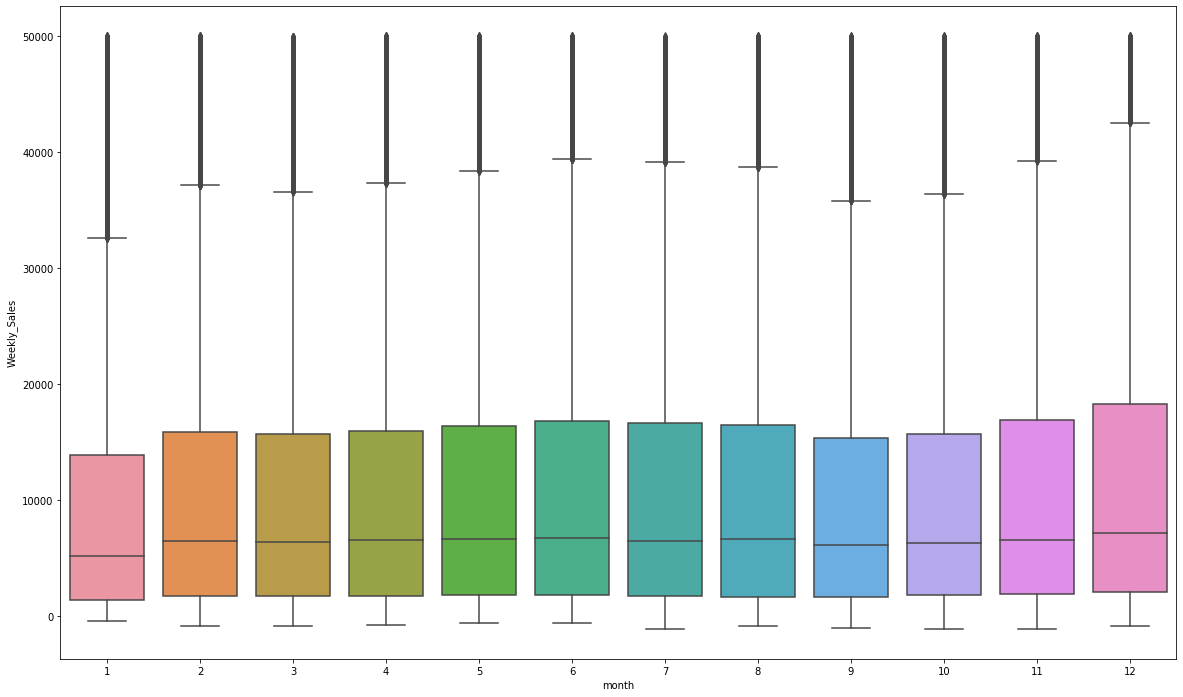

In [25]:
plt.figure(figsize = (20,12))
sns.boxplot(train3['month'], train3['Weekly_Sales'])

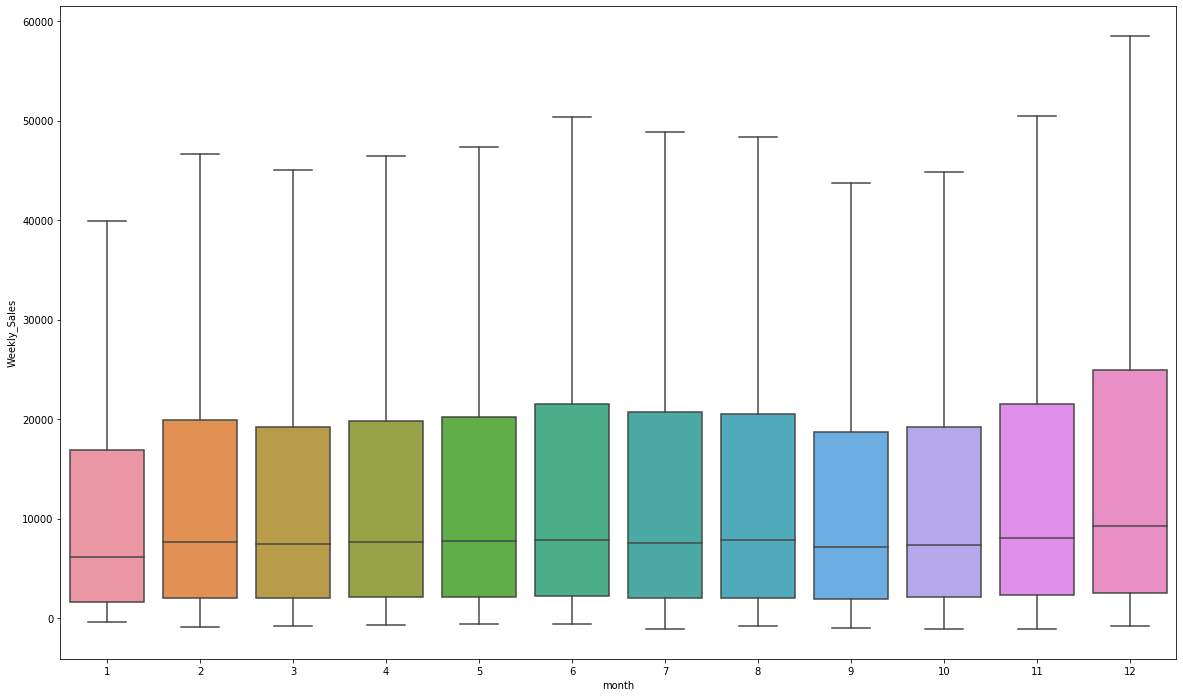

In [26]:
plt.figure(figsize = (20,12))
sns.boxplot(train['month'], train['Weekly_Sales'], showfliers = False) ## 아웃라이어 빼고 보여주기
# 월마다 판매량의 차이가 있다. 특히 최대값의 위치가 많이 차이남.
# 근데 음수가 있다. --> 반품이 많이 들어온 경우는 음수로 나올  수 있다.(데이터 설명 읽어보기)

In [27]:
## month가 추가되면 점수가 팍 오른다.
## 원래는 holiday 가 트루여도 판매량이 그닥 높지 않은 경우가 있기 때문에 도움이 안된다. 다만 month정보가 추가되면 month에 따른 holiday의 판매량 변화의 패턴을 잡을 수 있기 때문.
## 또한 평가 방법이 holiday를 맞추는 것에 더 많은 가중치를 주고 있다. 항상 평가방법을 먼저 봐야한다.
## month 별로 공휴일이 여러개일경우 한번은 판매량이 높고 다른때는 판매량이 낮을 경우 학습이 또 안될 수 있다.

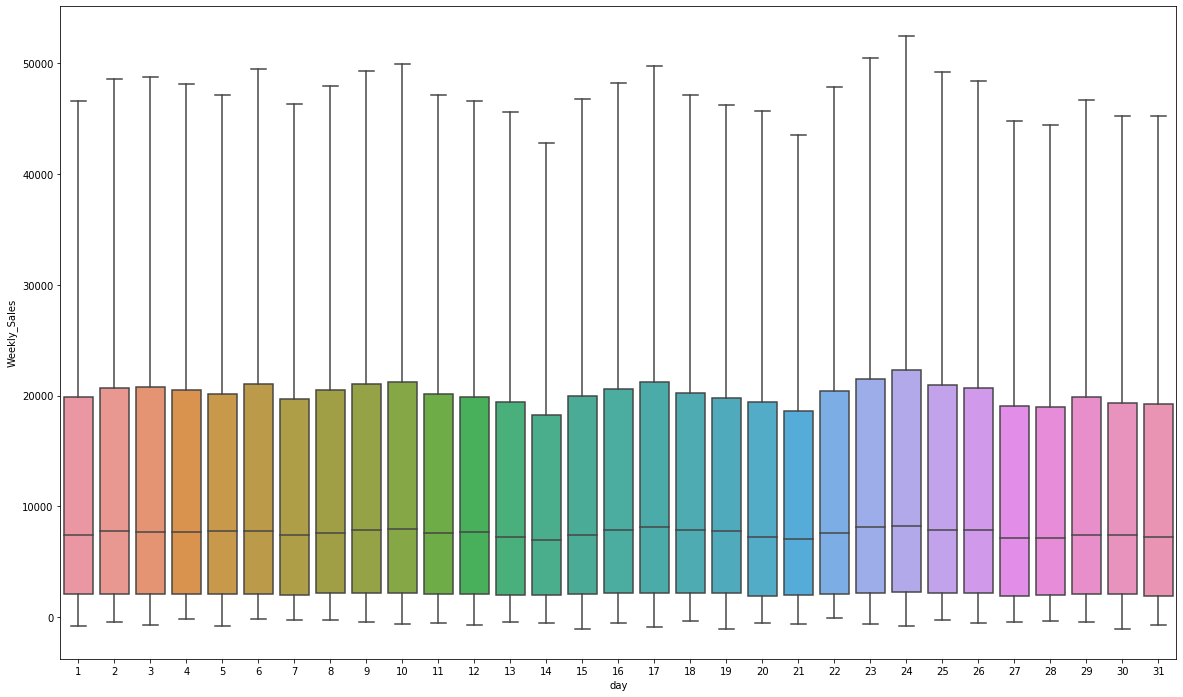

In [28]:
plt.figure(figsize = (20,12))
sns.boxplot(train['day'], train['Weekly_Sales'], showfliers = False)
## 월초와 월말에 사람들의 구매패턴이 다를 수 있다.

In [29]:
train.groupby(['day'])['Weekly_Sales'].mean()

day
1     15438.693561
2     16284.190735
3     16243.591840
4     16262.123390
5     16152.185352
6     16540.152518
7     15851.075764
8     16028.047405
9     16564.470980
10    16684.753968
11    15946.176870
12    15769.983633
13    15358.628217
14    14843.544775
15    15476.565690
16    16400.916009
17    16890.881861
18    15914.848035
19    15634.121093
20    15236.067426
21    14987.074671
22    15696.588300
23    17183.530448
24    17732.369226
25    16817.955895
26    16743.733480
27    14908.182971
28    15056.847856
29    15117.011770
30    15038.411334
31    14833.557736
Name: Weekly_Sales, dtype: float64

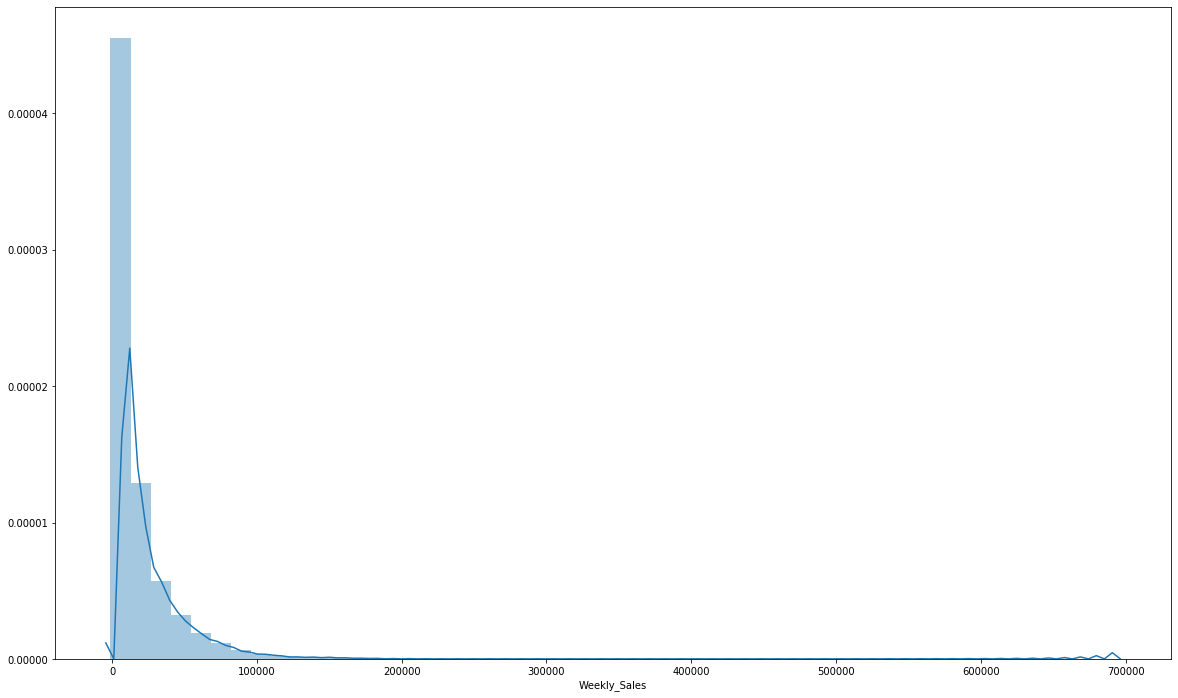

In [30]:
plt.figure(figsize=(20,12))
sns.distplot(train['Weekly_Sales']) ## 왼쪽으로 엄청 skewed 되어있다. --> log 씌우는 방법을 생각해보기

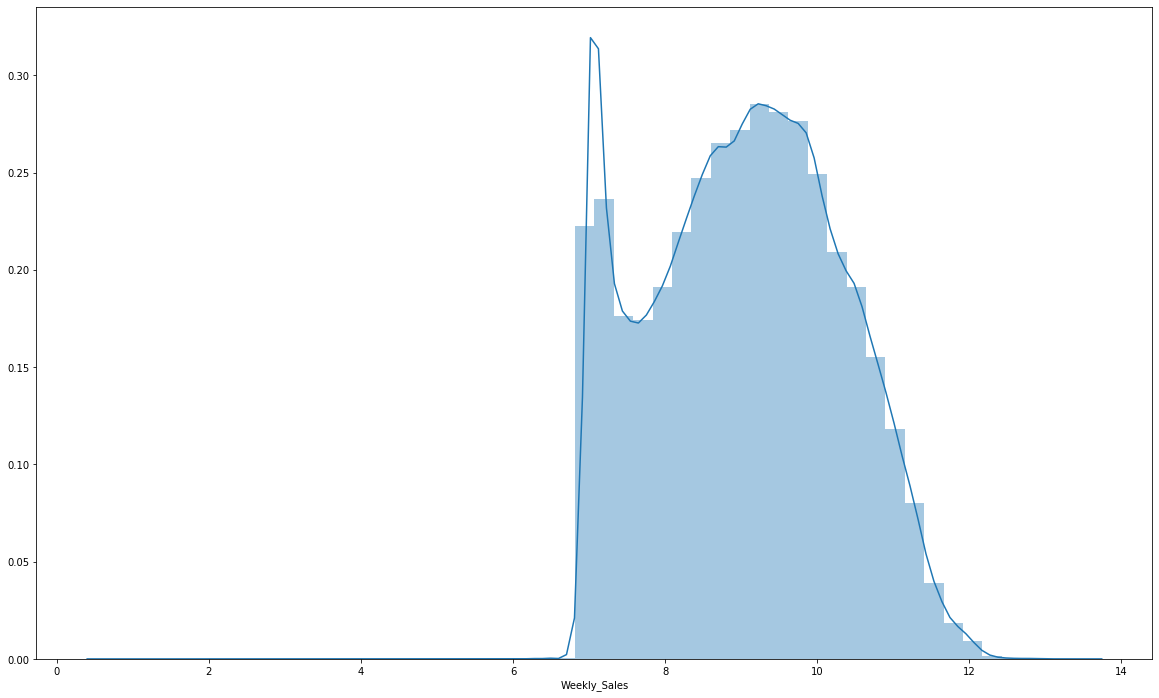

In [31]:
plt.figure(figsize=(20,12))
sns.distplot(np.log(train['Weekly_Sales']+1100))

In [32]:

train['Weekly_Sales'].min()
train['Weekly_Sales'].median()

7612.1

In [33]:
train['Weekly_Sales'].sort_values()[:30]
## 제일 작은 값은 너무 튄다.
## -98로 끝나는게 많다. 이런 패턴이 많으므로 지우지 말고 남긴다.
## 

16297    -1098.00
16295    -1098.00
16291    -1098.00
24830    -1008.96
35561     -898.00
6048      -863.00
93591     -798.00
193324    -798.00
93581     -798.00
93573     -798.00
193319    -778.50
332891    -771.90
273027    -705.00
54835     -698.00
309904    -698.00
6049      -698.00
183086    -649.00
183078    -649.00
113819    -598.00
193312    -598.00
193313    -598.00
326508    -598.00
103848    -594.00
155676    -590.04
113820    -548.14
113837    -548.00
376926    -543.00
93586     -515.00
153908    -500.00
183073    -499.00
Name: Weekly_Sales, dtype: float64

In [34]:
train2 = train.drop(['Date','Weekly_Sales'], axis = 1)
test2 = test.drop(['Date'], axis = 1)
display(train2, test2)

,Store,Dept,IsHoliday,year,month,day,Type,Size,week,week_num
0,1,1,False,2010,2,5,1,151315,5,1.0
1,1,1,True,2010,2,12,1,151315,6,2.0
2,1,1,False,2010,2,19,1,151315,7,3.0
3,1,1,False,2010,2,26,1,151315,8,4.0
4,1,1,False,2010,3,5,1,151315,9,1.0
...,...,...,...,...,...,...,...,...,...,...
421560,45,98,False,2012,9,28,2,118221,39,4.0
421561,45,98,False,2012,10,5,2,118221,40,1.0
421562,45,98,False,2012,10,12,2,118221,41,2.0
421563,45,98,False,2012,10,19,2,118221,42,3.0


,Store,Dept,IsHoliday,year,month,day,Type,Size,week,week_num
0,1,1,False,2012,11,2,1,151315,44,1.0
1,1,1,False,2012,11,9,1,151315,45,2.0
2,1,1,False,2012,11,16,1,151315,46,3.0
3,1,1,True,2012,11,23,1,151315,47,4.0
4,1,1,False,2012,11,30,1,151315,48,5.0
...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,2013,6,28,2,118221,26,4.0
115060,45,98,False,2013,7,5,2,118221,27,1.0
115061,45,98,False,2013,7,12,2,118221,28,2.0
115062,45,98,False,2013,7,19,2,118221,29,3.0


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)
rf.fit(train2, np.log(train['Weekly_Sales']+1100))
result = rf.predict(test2)
result

array([10.34291705,  9.98983781,  9.91876997, ...,  7.52384934,
        7.54050191,  7.48980791])

In [36]:
sub = pd.read_csv(os.getcwd()+'/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [37]:
sub['Weekly_Sales'] = np.exp(result) - 1100
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,29936.433098
1,1_1_2012-11-09,20703.762201
2,1_1_2012-11-16,19207.995744
3,1_1_2012-11-23,20141.637860
4,1_1_2012-11-30,23384.969393
...,...,...
115059,45_98_2013-06-28,674.500189
115060,45_98_2013-07-05,683.667920
115061,45_98_2013-07-12,751.681345
115062,45_98_2013-07-19,782.774774


In [38]:
sub.to_csv('sub.csv', index=False)